In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Cargar datos del Ipeco
data = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/CEEN%20UDD%20IPECO.csv', parse_dates=True, dayfirst=True, index_col='Fecha')
data.columns = ['ipeco', 'coyuntura', 'expectativas', 'sea', 'da', 'sef', 'df', 'iif', 'ipecotm']

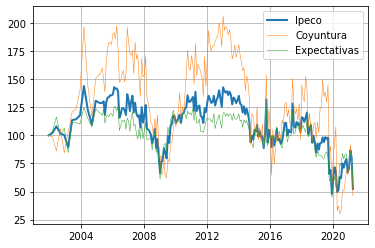

In [3]:
plt.plot(data['ipeco'], label='Ipeco', lw=2)
plt.plot(data['coyuntura'], label='Coyuntura', lw=0.5)
plt.plot(data['expectativas'], label='Expectativas', lw=0.5)
plt.legend()
plt.grid()

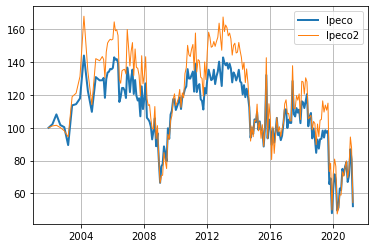

In [4]:
data['ipeco2'] = data[['sea', 'da', 'sef', 'df', 'iif']].mean(axis=1)

plt.plot(data['ipeco'], label='Ipeco', lw=2)
plt.plot(data['ipeco2'], label='Ipeco2', lw=1)
plt.legend()
plt.grid()

In [5]:
# Valores iniciales del Ipeco:
ipeco0 = 0.564465028
coyuntura0 = 0.375772273
expectativas0 = 0.688636166
sea0 = 0.503225806
da0 = 0.241887388
sef0 = 0.778145695
df0 = 0.502857143
iif0 = 0.78490566

data['ipeco'] = data['ipeco']*ipeco0
data['coyuntura'] = data['coyuntura']*coyuntura0
data['expectativas'] = data['expectativas']*expectativas0
data['sea'] = data['sea']*sea0
data['da'] = data['da']*da0
data['sef'] = data['sef']*sef0
data['df'] = data['df']*df0
data['iif'] = data['iif']*iif0
data = data.drop({'ipecotm', 'ipeco2'}, axis=1)

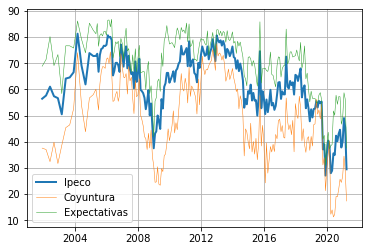

In [6]:
plt.plot(data['ipeco'], label='Ipeco', lw=2)
plt.plot(data['coyuntura'], label='Coyuntura', lw=0.5)
plt.plot(data['expectativas'], label='Expectativas', lw=0.5)
plt.legend()
plt.grid()

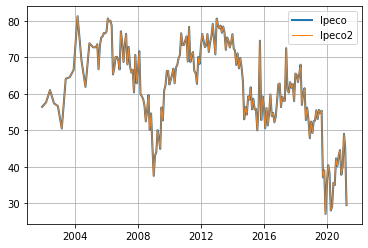

In [7]:
data['ipeco2'] = data[['sea', 'da', 'sef', 'df', 'iif']].mean(axis=1)

plt.plot(data['ipeco'], label='Ipeco', lw=2)
plt.plot(data['ipeco2'], label='Ipeco2', lw=1)
plt.legend()
plt.grid()

In [8]:
# Crear un dataframe vacío, con fechas mensuales desde el inicio del Ipeco
fecha = pd.date_range(start='2001-12-01', end='2021-02-01', freq='MS')
ipeco = pd.DataFrame(index=fecha)
data = ipeco.merge(data, how='left', left_index=True, right_index=True)

In [9]:
data_fillna = data.interpolate(method='linear')

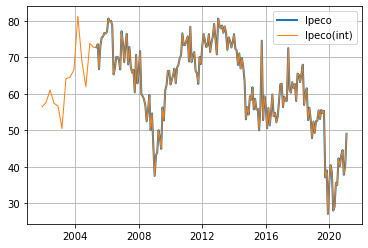

In [10]:
plt.plot(data['ipeco'], label='Ipeco', lw=2)
plt.plot(data_fillna['ipeco'], label='Ipeco(int)', lw=1)
plt.legend()
plt.grid()